In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from pandas import DataFrame, Series

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/titanic.csv')

In [ ]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
859,0,2,0,27.000000,0,0,13.0000
860,1,1,1,19.000000,0,0,30.0000
861,0,3,1,27.915709,1,2,23.4500
862,1,1,0,26.000000,0,0,30.0000


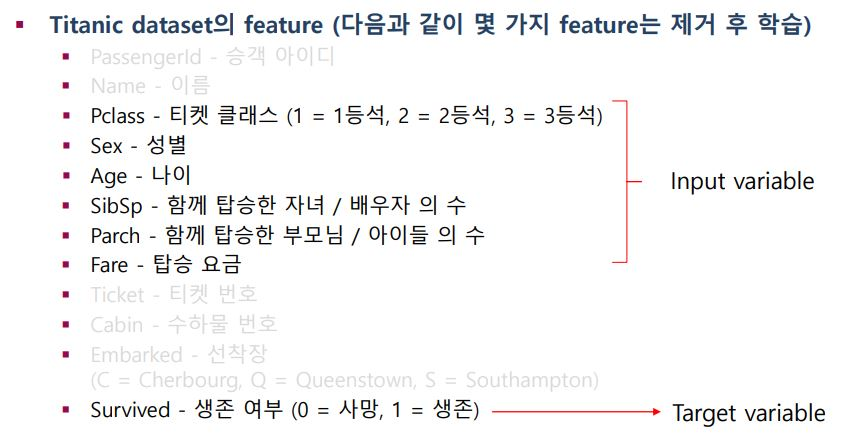

# **로지스틱 회귀**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train = titanic.drop('Survived', axis=1).values    
target_label = titanic['Survived'].values #'Survived'열을 target label로 지정

In [ ]:
#기존 train set을 train set과 validation set으로 나눔
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2022)
print(y_tr)

[0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0
 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1
 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 1 1 

In [ ]:
model = LogisticRegression()
model.fit(X_tr, y_tr) # 모델
prediction = model.predict(X_vld)
print(X_vld)

[[  2.           0.          24.           2.           0.
   73.5       ]
 [  3.           1.          35.           1.           1.
   20.25      ]
 [  3.           0.          32.           0.           0.
    7.75      ]
 ...
 [  1.           0.          33.           0.           0.
    5.        ]
 [  1.           0.          17.           0.           2.
  110.8833    ]
 [  3.           0.          30.72664459   0.           0.
    9.5       ]]


In [ ]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

# **Confusion Matrix**

In [ ]:
confusion_matrix(y_vld,prediction)

array([[96, 17],
       [17, 43]])

In [ ]:
print('Accuracy: {:.2f}% \nPrecision: {:.2f}% \nRecall: {:.2f}% \nF1-score: {:.2f}% '.format(100 * accuracy_score(y_vld,prediction),100*precision_score(y_vld,prediction),
                                                                         100*recall_score(y_vld,prediction),100*f1_score(y_vld,prediction)))

Accuracy: 80.35% 
Precision: 71.67% 
Recall: 71.67% 
F1-score: 71.67% 


In [ ]:
#cut off 조절에 따른 모델의 성능을 평가해 보기 위하여 cut off 값 생성 및 각각의 성능 지표 도출

list = []
for i in np.linspace(0,1,100): #0~1 사이를 100등분하여 cut off
    pred = model.predict_proba(X_vld)[:,1] > i    # true false 값 저장
    cf_mtx = confusion_matrix(y_vld, pred)
    acc = accuracy_score(y_vld, pred)
    tpr = cf_mtx[0,0] / cf_mtx[0].sum()
    fpr = cf_mtx[1,0] / cf_mtx[1].sum()
    f1 = f1_score(y_vld, pred)
    list.append([i, acc, f1, tpr, fpr])

cut_off = DataFrame(list)
cut_off.columns = ["CUTOFF", "ACC", "F1", "TPR", "FPR"]
cut_off

,CUTOFF,ACC,F1,TPR,FPR
0,0.000000,0.346821,0.515021,0.000000,0.000000
1,0.010101,0.358382,0.519481,0.017699,0.000000
2,0.020202,0.358382,0.519481,0.017699,0.000000
3,0.030303,0.358382,0.519481,0.017699,0.000000
4,0.040404,0.358382,0.519481,0.017699,0.000000
...,...,...,...,...,...
95,0.959596,0.658960,0.032787,1.000000,0.983333
96,0.969697,0.653179,0.000000,1.000000,1.000000
97,0.979798,0.653179,0.000000,1.000000,1.000000
98,0.989899,0.653179,0.000000,1.000000,1.000000


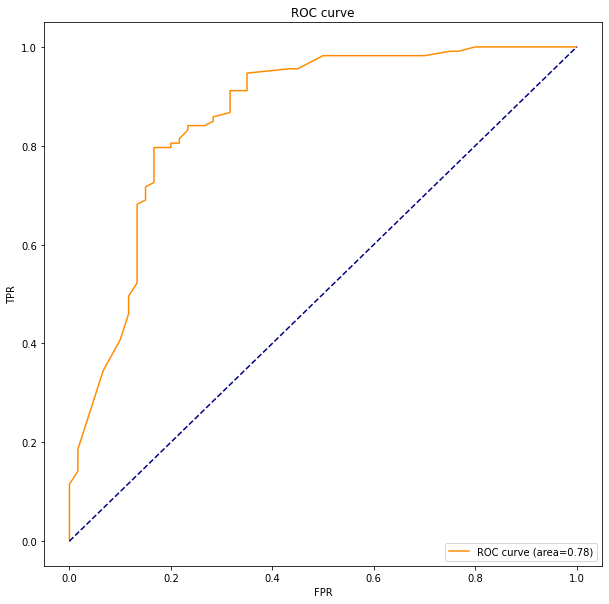

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_vld, prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(cut_off["FPR"],cut_off["TPR"], color="darkorange", label="ROC curve (area=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

# **실습 1**

*   Logistic Regression 모델을 사용하여, 임의의 데이터 값으로 Survive 여부에 대해 예측해 보십시오


*   [Pclass, Sex, Age, SibSp, Parch, Fare] - 임의로 설정



In [ ]:
# Pclass = 2, Sex = 0, Age- 24, SibSp = 2, Parch = , Fare = 73.5로 임의로 설정한 데이터 값 X_ran
X_ran = [[2, 0, 24, 2, 0, 73.5]]
print(X_ran)

prediction = model.predict(X_ran)
prediction  # Survive가 0이므로 사망

[[2, 0, 24, 2, 0, 73.5]]


array([0])